In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

%matplotlib inline

In [2]:
csv_path = Path('../Project-03/20210426_teamstats_df.csv')
teamstats_df = pd.read_csv(csv_path)

In [3]:
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0'])

In [4]:
# dropping columns for model tuning

teamstats_df = teamstats_df.drop(columns=['H_TEAM1', 'H_TEAM2', 'GAMEDATE', 'A_TEAM1', 'A_TEAM2'])

In [5]:
teamstats_df.shape

(12738, 188)

In [6]:
teamstats_df.head()

,H_H/A,H_W/L,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,1,53,92,45.7,14,28,50.0,59.3,11,...,0,0,0,0,0,0,0,0,0,0
1,1,0,48,80,46.3,10,31,32.3,84.2,7,...,0,0,0,0,0,0,0,0,0,0
2,1,1,48,82,51.2,10,32,31.3,91.7,4,...,0,0,0,0,0,0,0,0,0,0
3,1,0,63,94,38.3,6,22,27.3,67.4,15,...,0,0,0,0,0,0,0,0,0,0
4,1,0,48,68,41.2,10,29,34.5,78.9,8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#teamstats_df.info('include=all')

In [8]:
print(teamstats_df.iloc[:,0:32])

       H_H/A  H_W/L  H_MIN  H_FGA  H_FG%  H_3PM  H_3PA  H_3P%  H_FT%  H_OREB  \
0          1      1     53     92   45.7     14     28   50.0   59.3      11   
1          1      0     48     80   46.3     10     31   32.3   84.2       7   
2          1      1     48     82   51.2     10     32   31.3   91.7       4   
3          1      0     63     94   38.3      6     22   27.3   67.4      15   
4          1      0     48     68   41.2     10     29   34.5   78.9       8   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
12733      1      0     48    100   41.0     10     37   27.0   80.0      15   
12734      1      1     48     88   45.5      9     23   39.1   71.4      11   
12735      1      1     53     96   46.9      4     27   14.8   71.9       3   
12736      1      1     48     94   53.2      9     16   56.3   63.2      10   
12737      1      0     48     86   40.7      5     25   20.0   80.0       9   

       ...  A_FT%  A_OREB  A_DREB  A_AS

In [9]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'H_TEAM1']

In [10]:
#drop_teamstats_df = drop_teamstats_df.loc[:-1, teamstats_df.columns != 'H_TEAM2']

In [11]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'A_TEAM1']

In [12]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'A_TEAM2']

In [13]:
#drop_teamstats_df = teamstats_df.loc[:-1, teamstats_df.columns != 'GAMEDATE']

In [14]:
### drop_teamstats_df.info('include=all')

In [15]:
#print(type(drop_teamstats_df))

In [16]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('H_W/L', axis=1, inplace=True)
X.head(16)

,H_H/A,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,53,92,45.7,14,28,50.0,59.3,11,35,...,0,0,0,0,0,0,0,0,0,0
1,1,48,80,46.3,10,31,32.3,84.2,7,34,...,0,0,0,0,0,0,0,0,0,0
2,1,48,82,51.2,10,32,31.3,91.7,4,36,...,0,0,0,0,0,0,0,0,0,0
3,1,63,94,38.3,6,22,27.3,67.4,15,36,...,0,0,0,0,0,0,0,0,0,0
4,1,48,68,41.2,10,29,34.5,78.9,8,28,...,0,0,0,0,0,0,0,0,0,0
5,1,48,87,42.5,15,39,38.5,63.2,14,27,...,0,0,0,0,0,0,0,0,0,0
6,1,48,91,47.3,10,24,41.7,76.9,14,45,...,0,0,0,0,0,0,0,0,0,0
7,1,48,77,45.5,18,39,46.2,84.4,4,30,...,0,0,0,0,0,0,0,0,0,0
8,1,48,83,56.6,9,12,75.0,100.0,4,27,...,0,0,0,0,0,0,0,0,0,0
9,1,48,72,44.4,13,25,52.0,82.6,8,29,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Create the features (X) and target (y) sets
X = teamstats_df.iloc[:, 0:32].values
y = teamstats_df['H_W/L'].values

In [18]:
y = teamstats_df["H_W/L"].values

In [19]:
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [20]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [21]:
# Model set-up
number_input_features = 32
hidden_nodes_layer1 = 25
hidden_nodes_layer2 = 8
#hidden_nodes_layer3 = 4
#hidden_nodes_layer4 = 5
#hidden_nodes_layer5 = 5

In [22]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, 
          input_dim=number_input_features, 
          activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))


# Layer 3
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 4
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 5
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [23]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [24]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                825       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 208       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,042
Trainable params: 1,042
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training the model
batch_size = 1000
epochs = 50
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/50
8/8 [==============================] - 6s 385ms/step - loss: 6.0208 - accuracy: 0.5847 - tp: 2713.4444 - tn: 18.2222 - fp: 1910.7778 - fn: 60.6667 - precision: 0.5888 - recall: 0.9852 - auc: 0.4758 - val_loss: 1.6687 - val_accuracy: 0.4094 - val_tp: 544.0000 - val_tn: 434.0000 - val_fp: 599.0000 - val_fn: 812.0000 - val_precision: 0.4759 - val_recall: 0.4012 - val_auc: 0.3966
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 1.4702 - accuracy: 0.3887 - tp: 461.5556 - tn: 1371.5556 - fp: 561.1111 - fn: 2308.8889 - precision: 0.4520 - recall: 0.2045 - auc: 0.4522 - val_loss: 0.8948 - val_accuracy: 0.4625 - val_tp: 171.0000 - val_tn: 934.0000 - val_fp: 99.0000 - val_fn: 1185.0000 - val_precision: 0.6333 - val_recall: 0.1261 - val_auc: 0.6138
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.8198 - accuracy: 0.5156 - tp: 1097.5556 - tn: 1415.4444 - fp: 522.1111 - fn: 1668.0000 - precision: 0.6791 - recall: 0.3359 - auc: 0.6031 - val_lo

Epoch 22/50
8/8 [==============================] - 0s 15ms/step - loss: 0.5581 - accuracy: 0.7205 - tp: 2373.0000 - tn: 1016.1111 - fp: 918.8889 - fn: 395.1111 - precision: 0.7218 - recall: 0.8544 - auc: 0.7965 - val_loss: 0.5619 - val_accuracy: 0.7091 - val_tp: 1199.0000 - val_tn: 495.0000 - val_fp: 538.0000 - val_fn: 157.0000 - val_precision: 0.6903 - val_recall: 0.8842 - val_auc: 0.8013
Epoch 23/50
8/8 [==============================] - 0s 14ms/step - loss: 0.5512 - accuracy: 0.7229 - tp: 2462.5556 - tn: 934.3333 - fp: 982.7778 - fn: 323.4444 - precision: 0.7171 - recall: 0.8840 - auc: 0.8043 - val_loss: 0.5543 - val_accuracy: 0.7308 - val_tp: 1161.0000 - val_tn: 585.0000 - val_fp: 448.0000 - val_fn: 195.0000 - val_precision: 0.7216 - val_recall: 0.8562 - val_auc: 0.8074
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 0.5456 - accuracy: 0.7323 - tp: 2312.2222 - tn: 1129.1111 - fp: 800.0000 - fn: 461.7778 - precision: 0.7433 - recall: 0.8346 - auc: 0.8133 - va

Epoch 43/50
8/8 [==============================] - 0s 15ms/step - loss: 0.4121 - accuracy: 0.8184 - tp: 2508.0000 - tn: 1343.1111 - fp: 594.5556 - fn: 257.4444 - precision: 0.8060 - recall: 0.9091 - auc: 0.9033 - val_loss: 0.4079 - val_accuracy: 0.8321 - val_tp: 1196.0000 - val_tn: 792.0000 - val_fp: 241.0000 - val_fn: 160.0000 - val_precision: 0.8323 - val_recall: 0.8820 - val_auc: 0.9075
Epoch 44/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4085 - accuracy: 0.8280 - tp: 2482.1111 - tn: 1413.7778 - fp: 514.5556 - fn: 292.6667 - precision: 0.8308 - recall: 0.8903 - auc: 0.9044 - val_loss: 0.3992 - val_accuracy: 0.8372 - val_tp: 1185.0000 - val_tn: 815.0000 - val_fp: 218.0000 - val_fn: 171.0000 - val_precision: 0.8446 - val_recall: 0.8739 - val_auc: 0.9109
Epoch 45/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3975 - accuracy: 0.8323 - tp: 2433.2222 - tn: 1483.3333 - fp: 445.8889 - fn: 340.6667 - precision: 0.8467 - recall: 0.8740 - auc: 0.9092 - v

<AxesSubplot:title={'center':'Loss'}, xlabel='Epoch'>

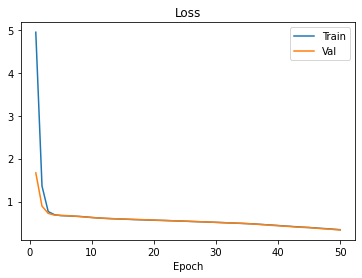

In [26]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<AxesSubplot:title={'center':'Accuracy'}, xlabel='Epoch'>

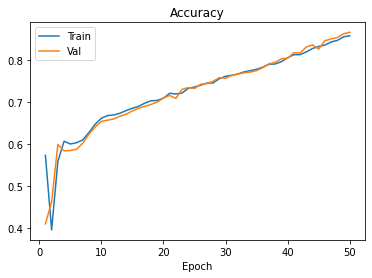

In [27]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<AxesSubplot:title={'center':'AUC'}, xlabel='Epoch'>

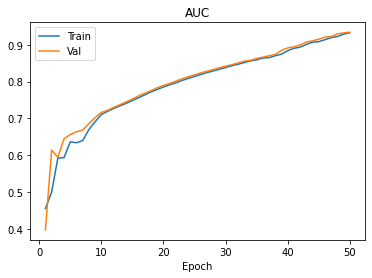

In [28]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [29]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [30]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000)

In [31]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

In [32]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=0.9411)'}, xlabel='FPR Test'>

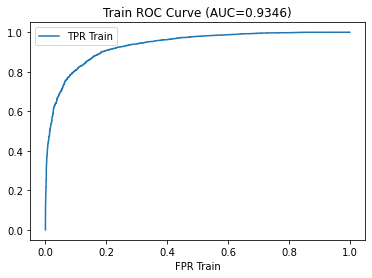

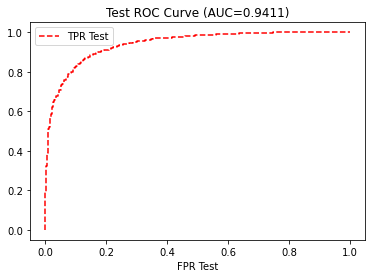

In [33]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

In [34]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.32636165618896484,
 'accuracy': 0.8640502095222473,
 'tp': 1670.0,
 'tn': 1082.0,
 'fp': 264.0,
 'fn': 169.0,
 'precision': 0.8634953498840332,
 'recall': 0.9081022143363953,
 'auc': 0.9410944581031799}

In [35]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=1670.0,FN=264.0
Negative(0),FP=169.0,TN=1082.0


In [36]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1251
           1       0.91      0.86      0.89      1934

    accuracy                           0.86      3185
   macro avg       0.86      0.86      0.86      3185
weighted avg       0.87      0.86      0.86      3185



In [37]:
model.predict(X_test)

array([[0.9626602 ],
       [0.7998445 ],
       [0.06668097],
       ...,
       [0.9169615 ],
       [0.70420736],
       [0.07189488]], dtype=float32)